In [1]:
import numpy as np
%matplotlib inline  
from matplotlib import pyplot as plt
import pandas as pd

In [76]:
# Build a mapper to convert from event code to event description
Event_code = pd.read_csv('CAMEO.eventcodes.txt', sep='\t')
Event_code.head()
mapper = {}
for i in Event_code.index:
    mapper[Event_code.ix[i].CAMEOEVENTCODE]=Event_code.ix[i].EVENTDESCRIPTION

In [105]:
countries = ['SLE.csv','YEM.csv']
for name in countries:
    df=pd.read_csv('raw_data/'+name) 

    # transform in a table with months as columns and events as rows
    df=df.pivot(columns='MonthYear',index='EventCode',values='N_events') 
    df=df.fillna(0)
    df=df.reset_index()


    # create column with event description
    df['EventDescription']=df['EventCode'].apply(lambda x: int(x))
    df.EventDescription=df.EventDescription.map(mapper)

    # # orders column
    df=df.reset_index()
    df.index=df.EventCode
    df.columns.name = 'index'
    columnordered=['EventDescription']
    list2=list(df.columns[2:-1])
    columnordered.extend(list2)
    df=df[columnordered]
    df.head()
    df.to_csv('clean_table/'+name)

# Example: plot protests in Yemen

We plot a timeseries of protests in Yemen

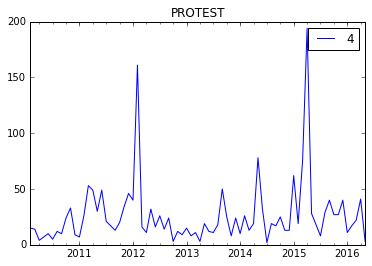

In [153]:
# open Yemen csv
YEM = pd.read_csv('clean_table/YEM.csv')

# select events
EventDescription ='PROTEST'

#p
months = YEM.columns[2:]
toplot=YEM[YEM.EventDescription=='PROTEST'][months].transpose()
toplot.index=[pd.to_datetime(x, format='%Y%m') for x in months.tolist()]
toplot.plot(title=EventDescription)